In [24]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
url = r"C:\Users\Data Professor\Desktop\Hypertension Project\hypertension_dataset.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


In [5]:
df.shape

(1985, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


In [7]:
df.duplicated().any()

np.False_

In [8]:
df.isna().any()

Age                 False
Salt_Intake         False
Stress_Score        False
BP_History          False
Sleep_Duration      False
BMI                 False
Medication           True
Family_History      False
Exercise_Level      False
Smoking_Status      False
Has_Hypertension    False
dtype: bool

In [9]:
df.isna().sum()

Age                   0
Salt_Intake           0
Stress_Score          0
BP_History            0
Sleep_Duration        0
BMI                   0
Medication          799
Family_History        0
Exercise_Level        0
Smoking_Status        0
Has_Hypertension      0
dtype: int64

In [10]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()

In [11]:
df["medication"].value_counts()

medication
Beta Blocker     412
ACE Inhibitor    323
Diuretic         245
Other            206
Name: count, dtype: int64

In [12]:
df["medication"] = df["medication"].fillna("None")

In [13]:
df["medication"].isna().any()

np.False_

In [14]:
df["has_hypertension"] = df["has_hypertension"].replace({"Yes":1, "No":0})

C:\Users\Data Professor\AppData\Local\Temp\ipykernel_868\941030597.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["has_hypertension"] = df["has_hypertension"].replace({"Yes":1, "No":0})


In [15]:
df["has_hypertension"].value_counts()

has_hypertension
1    1032
0     953
Name: count, dtype: int64

In [16]:
resampler = RandomUnderSampler()

In [17]:
x = df.drop(["has_hypertension"], axis = 1)
y = df["has_hypertension"]

In [18]:
resampled_x, resampled_y = resampler.fit_resample(x,y)

In [19]:
resampled_y.value_counts()

has_hypertension
0    953
1    953
Name: count, dtype: int64

In [20]:
x_train, x_test, y_train, y_test = train_test_split(resampled_x, resampled_y, test_size = .2, random_state = 42)

In [21]:
num_cols = x.select_dtypes(include=["number"]).columns 
cat_cols = x.select_dtypes(include=["object"]).columns

In [22]:
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("scaler", OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value = -1))
])


processor = ColumnTransformer(
    transformers=[
        ("num_pipe", num_pipe, num_cols),
        ("cat_pipe", cat_pipe, cat_cols)
    ], 
    remainder = "passthrough"
)

processor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_pipe',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['age', 'salt_intake', 'stress_score', 'sleep_duration', 'bmi'], dtype='object')),
                                ('cat_pipe',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 Index(['bp_history', 'medication', 'family_history', 'exercise_level',
       'smoking_status'],
      dtype='object'))])

In [25]:
Models = {
    "Linear Model" : LogisticRegression(),
    "Tree Model" : DecisionTreeClassifier(),
    "Random Forest Model" : RandomForestClassifier(),
    "Vector Model" : SVC(),
    "Neighbors Model" : KNeighborsClassifier(),
    "XGBoost" : XGBClassifier()
}

for name, models in Models.items():
    model = Pipeline([
        ("transformer", processor),
        ("model", models)
    ]).fit(x_train, y_train)
    prediction = model.predict(x_test)

    report = classification_report(y_test, prediction)
    matrix = confusion_matrix(y_test, prediction)
    print(f"The Classification Report for {name}:")
    print(report)
    print()
    print(f"The Confusion Matrix for {name}:")
    print(matrix)
    print("-"*100)



    
    

The Classification Report for Linear Model:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       188
           1       0.84      0.81      0.82       194

    accuracy                           0.82       382
   macro avg       0.82      0.82      0.82       382
weighted avg       0.82      0.82      0.82       382


The Confusion Matrix for Linear Model:
[[157  31]
 [ 37 157]]
----------------------------------------------------------------------------------------------------
The Classification Report for Tree Model:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       188
           1       0.93      0.96      0.95       194

    accuracy                           0.95       382
   macro avg       0.95      0.94      0.94       382
weighted avg       0.95      0.95      0.94       382


The Confusion Matrix for Tree Model:
[[174  14]
 [  7 187]]
-----------------------------------

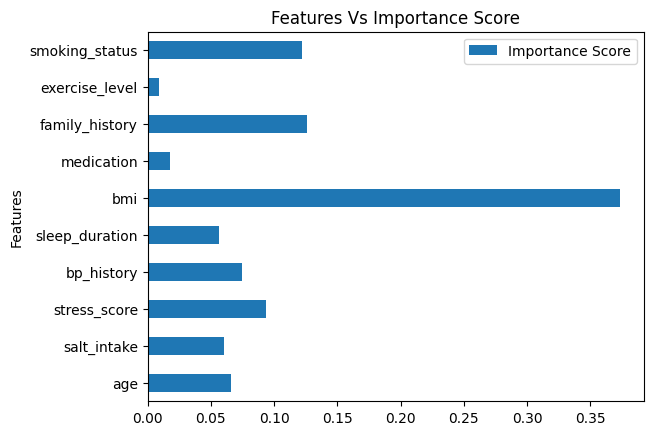

In [39]:
## xgboost model 
xgboost_model = Pipeline([
    ("transformer", processor),
    ("xgboost_model", XGBClassifier())
]).fit(x_train, y_train)


## feature importance 
features = x_train.columns
importance = xgboost_model.named_steps["xgboost_model"].feature_importances_

importance_df = pd.DataFrame(
    {
        "Features" : features,
        "Importance Score" : importance
    }
)
importance_df
importance_df.plot(x = "Features", y = "Importance Score", kind = "barh")
plt.title("Features Vs Importance Score")
plt.show()



In [37]:
## Top 5 Important Features
importance_df.sort_values(by = "Importance Score", ascending = False).reset_index().head().round(2)

,index,Features,Importance Score
0,5,bmi,0.37
1,7,family_history,0.13
2,9,smoking_status,0.12
3,2,stress_score,0.09
4,3,bp_history,0.07


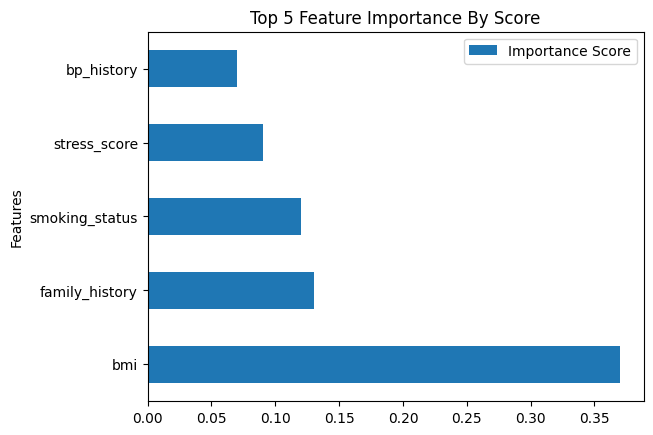

In [40]:
ranked_importance = importance_df.sort_values(by = "Importance Score", ascending = False).reset_index().head().round(2).plot(x = "Features", y = "Importance Score", kind = "barh")
plt.title("Top 5 Feature Importance By Score")
plt.show()